In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine,reflect=True)

In [6]:
# reflect the tables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# set up the session
session = Session(engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
Measurement_first_row = session.query(Measurement).first()
Measurement_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fbe479a1f98>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [11]:
Station_first_row = session.query(Station).first()
Station_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fbe479f9ef0>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [52]:
import datetime as dt
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
recent_12_mo = dt.date(2017,8,23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
recent = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= recent_12_mo).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_recent_df = pd.DataFrame(recent, columns=['date','precipitation'])
prcp_recent_df.set_index('date', inplace=True)

# Sort the dataframe by date
prcp_recent_df.sort_values(by='date', inplace=True)

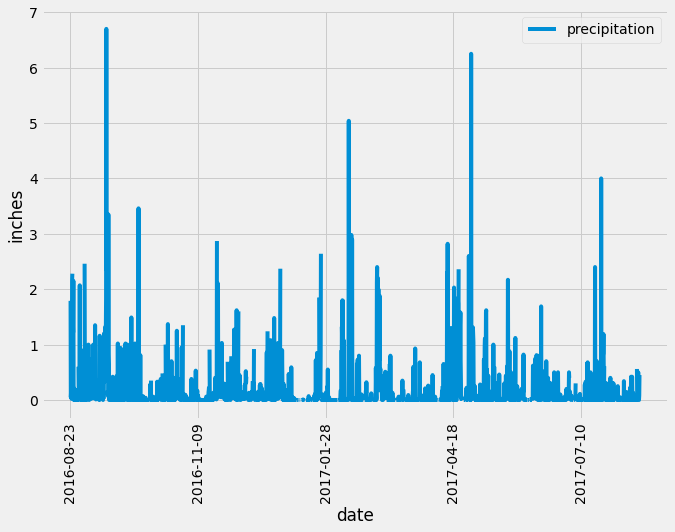

In [53]:
# Use Pandas Plotting with Matplotlib to plot the data
with plt.style.context('fivethirtyeight'):
    prcp_recent_df.plot(figsize=(10,7),x_compat=True,rot=90)
plt.ylabel('inches')
plt.savefig('Images/RecentYearPrecip.png')
plt.show()

In [55]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_recent_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()